In [9]:
import festim as F
import fenics as f
import numpy as np
import h_transport_materials as htm
import matplotlib.pyplot as plt
from MSPBPermFuncs import *

/Users/colinweaver/Documents/MIT Documents/MSPB/MSPBPermSim


Model parameters:

In [11]:
t_substrate = 1e-03
t_barrier = 1e-06
perm_model = F.Simulation()

In [12]:
# Assigning materials
barrier_D = htm.diffusivities.filter(material="tungsten")[0]
barrier_S = htm.solubilities.filter(material="tungsten")[0]
substrate_D = htm.diffusivities.filter(material="316l_steel").filter(author="reiter").filter(year=1996)[0]
substrate_S = htm.solubilities.filter(material="316l_steel").filter(author="reiter").filter(year=1996)[0]

AssignMaterials(perm_model, barrier_D, barrier_S, substrate_D, substrate_S)

In [13]:
t_substrate = 1e-03
t_barrier = 1e-06
MeshModel(perm_model, t_barrier, t_substrate)

In [14]:
T = 600 # K
P_up = 1e04 # Pa
ApplyBCs(perm_model, T, P_up, barrier_S)

In [15]:
folder = 'results'
final_time = 1e05
derived_quantities = RunModel(perm_model, final_time, folder)

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...
100.0 %        1.0e+05 s    Elapsed time so far: 0.5 s


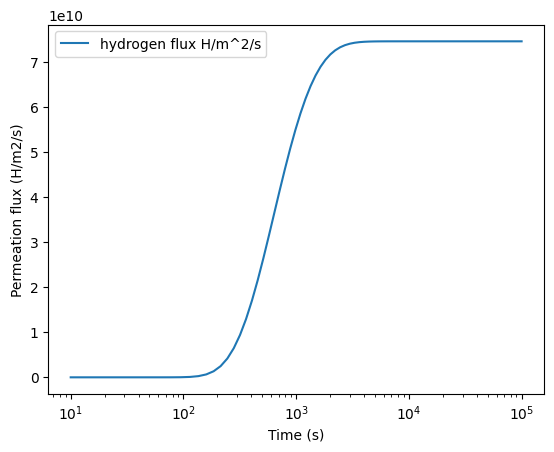

In [16]:
times = derived_quantities.t
computed_flux = derived_quantities.filter(surfaces=2, fields="solute").data
computed_flux = -np.array(computed_flux)

plt.figure()

plt.plot(times, computed_flux, label="hydrogen flux H/m^2/s")

plt.xscale("log")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Permeation flux (H/m2/s)")
plt.show()